# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [2]:
device ="cuda" if torch.cuda.is_available() else "cpu"

In [3]:
!pip install torchinfo --proxy 70.10.15.10:8080
import torchinfo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 단어 자동 완성
* 4개의 문자로 구성된 단어의 마지막 문자 예측 모델
* character 분류 모델


## Tokenizing
* 단어집 생성

In [ ]:
text_data = ['word', 'wood', 'deep', 'dive', 'cold', 'love', 'cool', 'load', 'kiss', 'kind']

def tokenize(data):
  tokens = []
  # code here

  
vocab = tokenize(text_data)
vocab

{'s': 0,
 'w': 1,
 'v': 2,
 'n': 3,
 'o': 4,
 'i': 5,
 'k': 6,
 'r': 7,
 'e': 8,
 'p': 9,
 'l': 10,
 'd': 11,
 'a': 12,
 'c': 13}

In [ ]:
i2c = # code here
i2c

{0: 's',
 1: 'w',
 2: 'v',
 3: 'n',
 4: 'o',
 5: 'i',
 6: 'k',
 7: 'r',
 8: 'e',
 9: 'p',
 10: 'l',
 11: 'd',
 12: 'a',
 13: 'c'}

## 시퀀스 변환

In [ ]:
seq = # code here
seq

[[1, 4, 7, 11],
 [1, 4, 4, 11],
 [11, 8, 8, 9],
 [11, 5, 2, 8],
 [13, 4, 10, 11],
 [10, 4, 2, 8],
 [13, 4, 4, 10],
 [10, 4, 12, 11],
 [6, 5, 0, 0],
 [6, 5, 3, 11]]

## One-Hot Encoding
* `torch.nn.functional.one_hot()`

In [ ]:
import torch.nn.functional as F

X = # code here
y = # code here
X_enc = # code here
X_enc[:2], y[:2], X_enc.shape, y.shape, y.max()

(tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]),
 tensor([11, 11]),
 torch.Size([10, 3, 14]),
 torch.Size([10]),
 tensor(11))

## 모델 생성

In [ ]:
import torch.nn as nn
torch.manual_seed(0)

class NextChar(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    # code here


  def forward(self, x):
    # code here
    return x

model = NextChar(len(vocab), 128, len(vocab))
output = model(X_enc)
output.shape

torch.Size([10, 14])

## 모델 학습

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters())

losses = []
for epoch in range(1000):
  output = model(X_enc)
  opt.zero_grad()
  cost = loss_fn(output, y)
  cost.backward()
  opt.step()

  if epoch%100==0:
    print(f'epoch={epoch}, cost:{cost.item()}')
  losses.append(cost.item())



epoch=0, cost:2.6926026344299316
epoch=100, cost:0.39995887875556946
epoch=200, cost:0.04750177636742592
epoch=300, cost:0.013277577236294746
epoch=400, cost:0.006181691773235798
epoch=500, cost:0.0036220229230821133
epoch=600, cost:0.0023990818299353123
epoch=700, cost:0.001712761470116675
epoch=800, cost:0.0012863705633208156
epoch=900, cost:0.0010022077476605773


## 추론

In [ ]:
output = # code here
y_pred = # code here

print(text_data)
print('X:',  # code here)
print('pred:', # code here)

['word', 'wood', 'deep', 'dive', 'cold', 'love', 'cool', 'load', 'kiss', 'kind']
X: ['wor', 'woo', 'dee', 'div', 'col', 'lov', 'coo', 'loa', 'kis', 'kin']
pred: ['d', 'd', 'p', 'e', 'd', 'e', 'l', 'd', 's', 'd']


# Word Embedding


## 문장 긍정/부정 분류
* 0 : 부정(negative)
* 1 : 긍정(positive)

In [ ]:
text_data = ['very good nice quality',
          'stop lies',
          'ugly terrible',
          'excellent work',
          'adorable lovely',
          'bad',
          'greate nice']
y = np.array([1, 0, 0, 1, 1, 0, 1]) #1 :pos, 0 : neg

## Tokenizing
* `torchtext.data.utils.get_tokenizer()`
* `torchtext.vocab.build_vocab_from_iterator()`
* `vocab.get_itos()`
* `vocab.get_stoi()`
* `seq = vocab(["word])`
* `word=vocab.lookup_tokens([seq])`

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = # code here

def tokenize(text):
  for s in text:
    yield tokenizer(s)

vocab = # code here


In [ ]:
len(vocab)

16

['<pad>',
 '<unk>',
 'nice',
 'adorable',
 'bad',
 'excellent',
 'good',
 'greate',
 'lies',
 'lovely',
 'quality',
 'stop',
 'terrible',
 'ugly',
 'very',
 'work']

{'very': 14,
 'ugly': 13,
 '<pad>': 0,
 'quality': 10,
 'nice': 2,
 '<unk>': 1,
 'bad': 4,
 'terrible': 12,
 'lies': 8,
 'excellent': 5,
 'stop': 11,
 'work': 15,
 'good': 6,
 'adorable': 3,
 'greate': 7,
 'lovely': 9}

([14, 2], ['very', 'nice'])

## Text to Sequence

In [ ]:
seq= # code here
seq

[tensor([14,  6,  2, 10]),
 tensor([11,  8]),
 tensor([13, 12]),
 tensor([ 5, 15]),
 tensor([3, 9]),
 tensor([4]),
 tensor([7, 2])]

## padding
* `torch.nn.utils.rnn.pad_sequence(seq, batch_first)`

In [ ]:
import torch.nn.utils.rnn as rnn_utils
X =# code here
X

tensor([[14,  6,  2, 10],
        [11,  8,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  9,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]])

## 모델 생성

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        # code here
        
    def forward(self, x):
        # code here

        return x

## 모델 학습 및 추론

In [ ]:
torch.manual_seed(0)

model = TextClassificationModel(len(vocab), 2, 1)
loss_fn = torch.nn.BCELoss()
opt = torch.optim.Adam(model.parameters())

for i in range(5000):
  output = model(X)
  opt.zero_grad()
  cost = loss_fn(output, torch.FloatTensor(y).view(-1, 1))
  cost.backward()
  opt.step()
print('target:', y)
print('output:', (output>=0.5).float())

target: [1 0 0 1 1 0 1]
output: tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


## Embedding Layer의 weights 시각화

[[-2.4334319  -0.8679732 ]
 [-0.25057858 -0.4338788 ]
 [ 1.2296567   2.1355274 ]
 [ 0.53783464 -3.4137537 ]
 [-1.4442064   0.6517211 ]
 [ 2.0226734  -1.5348928 ]
 [ 0.5887725   1.2018392 ]
 [ 2.3392754  -1.7587653 ]
 [-1.5661091  -1.5961248 ]
 [ 1.337331    0.8580178 ]
 [ 1.6383116  -2.1011572 ]
 [-0.57956797  2.7144701 ]
 [-0.6288151  -1.0388124 ]
 [-1.6818316   1.8739498 ]
 [ 1.9119207   0.51198494]
 [ 2.4873044  -0.2018592 ]] (16, 2)


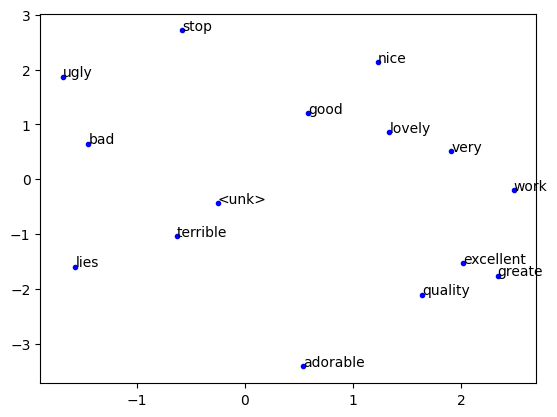

In [ ]:
weights= model.embedding.weight.detach().numpy()
print(weights, weights.shape)

for idx, (x1, x2) in enumerate(weights):
    if idx == 0 : continue
    plt.plot(x1, x2, 'b.')
    plt.annotate(vocab.get_itos()[idx], (x1,x2))

# IMDB 감성분류

## 데이터 준비
* Token, Seequence 처리 된 데이터 사용

In [4]:
import keras
max_len = 500

imdb = keras.datasets.imdb

voca_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=voca_size)
print(f'train set : {len(X_train)}, test set: {len(X_test), }, classes : {max(y_train)+1}')

train set : 25000, test set: (25000,), classes : 2


In [5]:
imdb_word_index = imdb.get_word_index()
imdb_index_word = { idx : key for key, idx in imdb_word_index.items()}
print(X_train[0][:20])

# 0:pad, 1:<start>, 2:UNK
' '.join([imdb_index_word.get(i-3, '?') for i in X_train[0][:20]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you"

## Padding

In [ ]:
#padding
max_len = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [ ]:
X_train[:5]

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       [ 687,   23,    4, ...,   21,   64, 2574],
       [   0,    0,    0, ...,    7,   61,  113]], dtype=int32)

## DataSet, DataLoader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(torch.tensor(X_train), torch.FloatTensor(y_train).view(-1,1))
test_ds = TensorDataset(torch.tensor(X_test), torch.FloatTensor(y_test).view(-1,1))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

## 모델 생성

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class IMDBClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.LSTM(embed_dim, 120, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(120*2, 32)
        self.dropout = nn.Dropout(0.2)
        self.out = nn.Linear(32, num_class)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc1(x[:,-1,:])
        x = F.relu(x)
        x = self.dropout(x)
        x = self.out(x)
        x = F.sigmoid(x)
        return x

## 모델 학습

In [ ]:
def fit(model, loader, loss_fn, opt):
  n_batch = len(loader)
  loss=0
  model.train()
  for (x, y) in loader:
    x, y = x.to(device), y.to(device)
    y_pred = model(x)
    cost = loss_fn(y_pred, y)
    opt.zero_grad()
    cost.backward()
    opt.step()
    loss += cost.item()/n_batch
  return loss

def evaluate(model, loader, metric_fn):
  loss=0
  n_batch = len(loader)
  model.eval()
  with torch.no_grad():
    for x, y in loader:
      x, y = x.to(device), y.to(device)
      y_pred = model(x)
      cost = metric_fn(y_pred, y)
      loss += cost.item()/n_batch
  return loss

In [ ]:
model = IMDBClassifier(voca_size, 250, 1).to(device)
loss_fn = torch.nn.BCELoss()
opt = torch.optim.Adam(model.parameters())

history={'loss':[], 'val_loss':[]}
for epoch in range(10):
  train_loss = fit(model, train_loader, loss_fn, opt)
  history['loss'].append(train_loss)
  test_loss = evaluate(model, test_loader, loss_fn)
  print(f'epoch={epoch}, loss:{train_loss}, test_loss:{test_loss}')


epoch=0, loss:0.5739458014288217, test_loss:0.4663517675588807
epoch=1, loss:0.4004007678888643, test_loss:0.3843283314076836
epoch=2, loss:0.3518252742412448, test_loss:0.3704120553363012
epoch=3, loss:0.28144904159371487, test_loss:0.3738660917943701
epoch=4, loss:0.19476902381995753, test_loss:0.35535253927378346
epoch=5, loss:0.1363298530735628, test_loss:0.4236150126132517
epoch=6, loss:0.09649178666322292, test_loss:0.45826260312972483
epoch=7, loss:0.0654497571370524, test_loss:0.5618287979546562
epoch=8, loss:0.052382022466348564, test_loss:0.600469742056049
epoch=9, loss:0.04291205848460003, test_loss:0.62734248007045


## 평가

In [ ]:
def predict(model, loader, fn=None, **kw):
  preds = []
  model.eval()
  with torch.no_grad():
    for X, y in loader:
      X = X.to(device)
      y_pred = model(X)
      if fn:
        y_pred = fn(y_pred, **kw)
      preds.append(y_pred.detach().cpu().numpy())
  return np.concatenate(preds)

In [ ]:
from sklearn.metrics import accuracy_score

proba_train = predict(model, DataLoader(train_ds, shuffle=False))
proba_test = predict(model, test_loader)
pred_train = proba_train>=0.5
pred_test = proba_test>=0.5
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)

print(f'train acc:{train_acc}, test acc:{test_acc}')

train acc:0.99624, test acc:0.85764


# 한국어 처리
## KoNLPy(코엔엘파이)
* Korean NLP in Python
* 한국어 형태소 Tokeniziner 통합 라이브러리
* https://konlpy.org/en/latest/
* 설치
    * `!pip install konlpy`
* 9품사
    * 명사(개,고양이), 대명사(나,너), 동사(간다,먹었다), 형용사(예쁘다), 부사(매우,정말), 조사(은,는), 감탄사(우아), 수사(하나,둘), 관형사(이,그,저,새,헌)
* Sub tag package
    * kKma
    * Komoran
    * Okt
    * Hannanum
    * Mecab


In [6]:
!pip install konlpy --proxy 70.10.15.10:8080


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
os.environ['JAVA_HOME'] = 'C:\Program Files\Java\jdk-20'

## Kkma(꼬꼬마)
* 서울대학교 IDS 연구실
* http://kkma.snu.ac.kr/
* API
    * morphs(phrase) : 문장을 형태소 단위로 토크나이징하고 리스트로 반환
    * nouns(phrase) : 문장을 명사 품사만 토큰나이징
    * pos(phrase, flatten=True) : 문장을 형태소와 품사 태크를 튜플로 묶어 리스트로 반환
    * sentences(phrase) : 여러 문장을 분리

In [9]:
from konlpy.tag import Kkma

kkma = Kkma()
text = '나는 누구이고 여기는 어디인가.'

morphs = kkma.morphs(text)
print(morphs)

pos = kkma.pos(text)
print(pos)

noun = kkma.nouns(text)
print(noun)

sentences = '오늘 날시 어때요? 내일은 춥다던데.'
s = kkma.sentences(sentences)
print(s)


['나', '는', '누구', '이', '고', '여기', '는', '어디', '이', 'ㄴ가', '.']
[('나', 'NP'), ('는', 'JX'), ('누구', 'NP'), ('이', 'VCP'), ('고', 'ECE'), ('여기', 'NP'), ('는', 'JX'), ('어디', 'NP'), ('이', 'VCP'), ('ㄴ가', 'EFQ'), ('.', 'SF')]
['나', '누구', '여기', '어디']
['오늘 날 시 어 때요?', '내일은 춥다 던데.']


## Komoran(코모란)
* Korean Morphological ANalyzer, Shineware
* https://github.com/shineware/KOMORAN
* https://www.shineware.co.kr/products/komoran/
* API
    * morphs(phrase) : 문장을 형태소 단위로 토크나이징하고 리스트로 반환
    * nouns(phrase) : 문장을 명사 품사만 토큰나이징
    * pos(phrase, flatten=True) : 문장을 형태소와 품사 태크를 튜플로 묶어 리스트로 반환

In [10]:
from konlpy.tag import Komoran

komoran = Komoran()
text = '나는 누구이고 여기는 어디인가.'

morphs = komoran.morphs(text)
print(morphs)

pos = komoran.pos(text)
print(pos)

noun = komoran.nouns(text)
print(noun)

noun = komoran.nouns("아버지가 방에 들어 가신다.")
print(noun)

['나', '는', '누구', '이', '고', '여기', '는', '어디', '이', 'ㄴ가', '.']
[('나', 'NP'), ('는', 'JX'), ('누구', 'NP'), ('이', 'VCP'), ('고', 'EC'), ('여기', 'NP'), ('는', 'JX'), ('어디', 'NP'), ('이', 'VCP'), ('ㄴ가', 'EF'), ('.', 'SF')]
[]
['아버지', '방']


## Okt
* Open source Korean Text Processor, Fork of Twitter
* https://github.com/open-korean-text/open-korean-text
* 완전한 형태소 분석 미지원
* API
    * morphs(phrase) : 문장을 형태소 단위로 토크나이징하고 리스트로 반환
    * nouns(phrase) : 문장을 명사 품사만 토큰나이징
    * pos(phrase, stem=False, join=False) : 문장을 형태소와 품사 태크를 튜플로 묶어 리스트로 반환
    * normlize(phrase) : 문장을 정규화
        * 예)before: 사랑햌ㅋ -> after: 사랑해ㅋㅋ
    * phrases(phrase) : 문장에서 어구 추출

In [11]:
#from konlpy.tag import Twitter
from konlpy.tag import Okt

okt = Okt()
text = '나는 누구이고 여기는 어디인가.'

morphs = okt.morphs(text)
print(morphs)

pos = okt.pos(text)
print(pos)

noun = okt.nouns(text)
print(noun)

noun = okt.nouns("아버지가 방에 들어 가신다.")
print(noun)

print(okt.normalize('오늘 날씨가 좋아욬ㅋㅋ'))

['나', '는', '누구', '이고', '여기는', '어디', '인가', '.']
[('나', 'Noun'), ('는', 'Josa'), ('누구', 'Noun'), ('이고', 'Josa'), ('여기는', 'Verb'), ('어디', 'Noun'), ('인가', 'Josa'), ('.', 'Punctuation')]
['나', '누구', '어디']
['아버지', '방']
오늘 날씨가 좋아요ㅋㅋ


# Dummy Chattbot
* 모델 학습 없이 자연어 생성

In [1]:
import os
os.environ["HTTP_PROXY"] = "70.10.15.10:8080"
os.environ['HTTPS_PROXY'] = "70.10.15.10:8080"
os.environ['CURL_CA_BUNDLE'] = ''
os.environ['PYTHONHTTPSVERIFY'] ='0' 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context



In [2]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

url_script = 'https://raw.githubusercontent.com/dltpdn/download/master/csv/script.txt'
script_file = 'script.txt'

with request.urlopen(url_script) as r:
  with open(script_file, 'wb') as f:

    f.write(r.read())

In [14]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

url_dict = 'https://raw.githubusercontent.com/dltpdn/download/master/csv/chatbot-data.json'
dict_file = 'chatbot-data.json'

with request.urlopen(url_dict) as r:
  with open(dict_file, 'wb') as f:
    f.write(r.read())

In [15]:
import codecs
from bs4 import BeautifulSoup
import urllib.request
from konlpy.tag import Okt
import os, re, json, random

script_file = 'script.txt'
dict_file = "./chatbot-data.json"
dic = {}
okt = Okt()

def register_dic(words, save=True):
    global dic
    if len(words) == 0: return
    tmp = ["@"]
    for word in words:
        #word = i[0]
        if word == "" or word == "\r\n" or word == "\n": continue
        tmp.append(word)
        if len(tmp) < 3: continue
        if len(tmp) > 3: tmp = tmp[1:]
        set_word3(dic, tmp)
        if word == "." or word == "?":
            tmp = ["@"]
            continue
    # 딕셔너리가 변경될 때마다 저장하기
    if save:
        json.dump(dic, open(dict_file,"w", encoding="utf-8"))

def set_word3(dic, s3):
    w1, w2, w3 = s3
    if not w1 in dic: dic[w1] = {}
    if not w2 in dic[w1]: dic[w1][w2] = {}
    if not w3 in dic[w1][w2]: dic[w1][w2][w3] = 0
    dic[w1][w2][w3] += 1

def make_sentence(head):
    if not head in dic: return ""
    ret = []
    if head != "@": ret.append(head)
    top = dic[head]
    w1 = word_choice(top)
    w2 = word_choice(top[w1])
    ret.append(w1)
    ret.append(w2)
    while True:
        if w1 in dic and w2 in dic[w1]:
            w3 = word_choice(dic[w1][w2])
        else:
            w3 = ""
        ret.append(w3)
        if w3 == "." or w3 == "?" or w3 == "": break
        w1, w2 = w2, w3
    ret = "".join(ret)
    return ret

def word_choice(sel):
    keys = sel.keys()
    return random.choice(list(keys))


def make_reply(text):
    # 문장 끝에 구두점 추가
    if not text[-1] in [".", "?"]: text += "."
    #문장 파싱후 단어 등록
    words = okt.morphs(text)
    register_dic(words)
    # 가장 먼저 발견된 단어가 사전에 있다면 그것을 기반으로 문장생성
    for word in words:
        if word in dic: return make_sentence(word)
    #아니면 시작 단어로 문장 생성
    return make_sentence("@")



# 딕셔너리가 있다면 읽어 들이기
if os.path.exists(dict_file):
    dic = json.load(open(dict_file,"r"))
    print("dictionary loaded.")
else:
    print("no dictionary. trainning chatbot is needed.")

if os.path.exists(script_file):
    f = open(script_file, 'rt', encoding='UTF8')
    while True:
        line = f.readline()
        if not line :
            break
        line = line.strip()
        if line == ""  :
            continue
        if not line[-1] in [".", "?"]: line += "."
        words = okt.morphs(line)
        register_dic(words, save=False)
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
    print("trained using script .")
else:
    print("no script file. ")


dictionary loaded.
trained using script .


In [16]:
print("대화를 종료하시려면 'exit'를 입력하세요.")
while True:
    txt = input("You :")
    #print('You:', txt)
    if txt == "exit":
        print("Bye~")
        break
    reply = make_reply(txt)
    print("Bot :%s"%reply)

대화를 종료하시려면 'exit'를 입력하세요.


You : 배고파요


Bot :내가몸좀쓸게.


You : 안녕?


Bot :안녕들하세요.


You : 잘가


Bot :꺼지쇼.


You : exit


Bye~


# 자연어 생성 모델

## Data 준비

In [3]:
import pandas as pd
url_train = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
train = pd.read_csv(url_train, sep='\t')
display(train.head())
print(train.shape)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


(150000, 3)


In [18]:
train[1000:1007]

,id,document,label
1000,9856453,정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그자체네요,1
1001,6961803,이영화만 성공 했어도 스퀘어가 에닉스랑 합병 할일은 없었을텐데..,0
1002,8681713,울컥하는 사회현실 ㅠㅠ,1
1003,5348290,기대를하나도안하면 할일없을때보기좋은영화,0
1004,9340549,소림사 관문 통과하기 진짜 어렵다는거 보여준 영화..극장에서 개봉하는거 반갑다..,1
1005,7357684,시리즈안나오나 ㅠㅠㅠㅠㅠㅠㅠㅠ,1
1006,9303587,끝난다는 사실이 너무 슬퍼요. 가슴이 뻥 뚫려버린것같아..,1


## 전처리 및 Tokenizing

In [ ]:
okt = Okt()
def preprocessing(df):
  df = df.dropna()
  df['document'] = df['document'].str.replace("[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ ]","")
  data =  df['document'].apply(lambda x: [word for word in okt.morphs(x)] + ['<eos>']) #각 문장의 끝에 '<eos>' 추가
  return data

review = preprocessing(train[1000:3000])  # 샘플 데이터 2000개, 학습시간을 줄이고자 함
print(len(review))
print(review[:10])

<ipython-input-92-0558ffe25af2>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ ]","")


2000
1000    [정말, 최고, 의, 명작, 성인, 이, 되고, 본, 이집트, 의, 왕자, 는, 또...
1001    [이영화, 만, 성공, 했어도, 스퀘어, 가, 에, 닉스, 랑, 합병, 할, 일, ...
1002                          [울컥, 하는, 사회, 현실, ㅠㅠ, <eos>]
1003    [기대, 를, 하나, 도안, 하, 면, 할, 일, 없을, 때, 보기, 좋은, 영화,...
1004    [소림사, 관문, 통과, 하기, 진짜, 어렵다는거, 보여준, 영화, 극장, 에서, ...
1005                       [시리즈, 안, 나오나, ㅠㅠㅠㅠㅠㅠㅠㅠ, <eos>]
1006    [끝난다는, 사실, 이, 너무, 슬퍼요, 가슴, 이, 뻥, 뚫려, 버린것, 같아, ...
1007                                      [펑점, 조절, <eos>]
1008                     [와이, 건, 진짜, 으리, 으리, 한, 데, <eos>]
1009                         [손발, 이, 오, 그라드, 네, 요, <eos>]
Name: document, dtype: object


## Text to Sequence

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

vocab = build_vocab_from_iterator(review.values, specials=['<pad>'])
def get_tokens(review):

  total_words = len(vocab)
  tokenized_sentences = [ torch.tensor(vocab(text)) for text in review]
  input_sequences = []
  for token in tokenized_sentences:
    for t in range(1, len(token)):
        n_gram_sequence = token[:t+1]
        input_sequences.append(n_gram_sequence)

  return input_sequences, total_words

input_sequences, total_words = get_tokens(review)
input_sequences[31:40]

[tensor([ 127,   14, 1973, 1459, 5097,    5,    6, 3482,  134, 7349,   85,  128,
           11, 5636]),
 tensor([ 127,   14, 1973, 1459, 5097,    5,    6, 3482,  134, 7349,   85,  128,
           11, 5636,    1]),
 tensor([1339,   43]),
 tensor([1339,   43,  907]),
 tensor([1339,   43,  907,  144]),
 tensor([1339,   43,  907,  144,  122]),
 tensor([1339,   43,  907,  144,  122,    1]),
 tensor([349,  10]),
 tensor([349,  10, 100])]

In [ ]:
vocab(['<pad>', '<eos>'])

[0, 1]

In [ ]:
total_words

7592

## Padding

In [ ]:
from torch.nn.utils.rnn import pad_sequence
def custom_padding(sequences, maxlen=None, padding='pre', pad=0.0):
    if maxlen:
        sequences.append(torch.LongTensor([pad]*maxlen))

    if padding == 'post':
        result = pad_sequence(sequences, batch_first=True, padding_value=pad)
    elif padding == 'pre':
        temp_seqs = [seq.flip(-1) for seq in sequences]
        result = pad_sequence(temp_seqs, batch_first=True, padding_value=pad).flip(-1)

    if maxlen:
        sequences.pop()
    return result[:-1]

In [ ]:
max_len = max([len(word) for word in input_sequences])
print("max_len:", max_len)
input_sequences = custom_padding(input_sequences,
                                         #maxlen=max_len,
                                         padding='pre')
input_sequences.shape

max_len: 60


torch.Size([26352, 60])

In [ ]:
X = input_sequences[:,:-1]  # 마지막 단어 제외함
y = input_sequences[:,-1]
X[:2], y[:2]

(tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0, 16],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0, 16, 37]]),
 tensor([37,  4]))

In [ ]:
vocab.lookup_tokens([16, 37, 4])

['정말', '최고', '의']

## Dataset, DataLoader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

ds = TensorDataset(X, y)
loader = DataLoader(ds, batch_size=64, shuffle=True)

## 모델 정의 및 학습

In [ ]:
class TextGen(torch.nn.Module):
    def __init__(self, vocab_size, embd_dim, num_class):
        super().__init__()
        self.embd = torch.nn.Embedding(vocab_size, embd_dim)
        self.rnn = torch.nn.LSTM(embd_dim, 256, 2, bidirectional=True, batch_first=True)
        self.fc = torch.nn.Linear(256*2, num_class)

    def forward(self, x):
        x = self.embd(x)
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1,:])
        return x

In [ ]:
def fit(model, loader, loss_fn, opt):
  n_batch = len(loader)
  loss=0
  model.train()
  for (x, y) in loader:
    x, y = x.to(device), y.to(device)
    y_pred = model(x)
    cost = loss_fn(y_pred, y)
    opt.zero_grad()
    cost.backward()
    opt.step()
    loss += cost.item()/n_batch
  return loss

def evaluate_accuracy(model, loader):
  acc=0
  n_batch = len(loader)
  model.eval()
  with torch.no_grad():
    for x, y in loader:
      x, y = x.to(device), y.to(device)
      y_pred = model(x)
      proba = F.softmax(y_pred,dim=1)
      idx = torch.argmax(proba, dim=1)
      acc += torch.mean((idx == y.view_as(idx)).float())/n_batch
  return acc

In [ ]:
model = TextGen(len(vocab), 256, total_words).to(device)
loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters())

for epoch in range(10):
  loss = fit(model, loader, loss_fn, opt)
  acc  = evaluate_accuracy(model, loader)
  print(f'epoch={epoch}, loss:{loss}, acc:{acc}')

epoch=0, loss:7.533384280297364, acc:0.0810578390955925
epoch=1, loss:6.944762714858192, acc:0.1146465390920639
epoch=2, loss:6.38028072384954, acc:0.1593599170446396
epoch=3, loss:5.440805133106636, acc:0.2906680107116699
epoch=4, loss:4.150729133087456, acc:0.48692867159843445
epoch=5, loss:2.8485134793716758, acc:0.6542397737503052
epoch=6, loss:1.873138834261199, acc:0.7894172072410583
epoch=7, loss:1.2109816398435431, acc:0.8756060600280762
epoch=8, loss:0.7671502511767503, acc:0.922569990158081
epoch=9, loss:0.48219389287592146, acc:0.9481570720672607


## 문장 생성

In [ ]:
# np.random.choice 선행 실습
import numpy as np

for i in range(10):
  print(np.random.choice(5, p=[0.1, 0, 0.3, 0.5, 0.1]), end=', ')

2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 

In [ ]:
eos = vocab(['<eos>'])[0]

def gen_text(seed, stochastic=True, max_len=60, ):
    seeds = [seed]
    for _ in range(1, max_len):
        token_list = vocab(seeds)
        token_list = custom_padding([torch.tensor(token_list)],
                                   maxlen=max_len-1,
                                   padding='pre')
        proba = F.softmax(model.cpu()(token_list), dim=1).detach().numpy()[0]
        if stochastic:
            # 확률 분포에 따른 확률적 선택
            pred = np.random.choice(proba.shape[0], p=proba)
        else:
            # 최대값 인덱스, 가장 높은 확률 선택
            pred = np.argmax(proba)
        output = vocab.lookup_token(pred)
        if pred == eos:
            break
        seeds.append(output)
    return ' '.join(seeds)

In [ ]:
gen_text("정말", stochastic=False)

'정말 이지 다시 보고싶은데 볼수가 없어요 볼수있는 방법 없을까요 제발'

In [ ]:
for i in range(5):
  ret = gen_text("정말")
  print(ret)

정말 재미있어요
정말 짱 이에요 진짜 감동 받을만큼 눈물나게잘 쓰셨네요 별점 십 점 드릴 게 요
정말 이영화 를 가지 고 이렇게 밖에 없다 실망 이다
정말 최고 의 드라마 외국 드라마 첨으로 깊게 빠져듬
정말 최고다


In [ ]:
for i in range(5):
  ret = gen_text("나")
  print(ret)

나 랑 닯 은 더 플라이 주인공 캬캬캬
나 해 라 됨 급 도 벗기고 킬링타임 용 게 무슨 추천
나 에게는 수면제
나 는 진리 다 보았는데 재밌었다
나 에게 쓰나미 도 영화 보다 나간 있는데 못 하고 빙빙 강용석 씨 모습 은 경악 ㅠ


In [ ]:
for i in range(5):
  ret = gen_text("우리")
  print(ret)

우리 들 보기 도 질린다 지 들은 뭐 가 잘났다고 성우 욕 하더니 뻔 뻔하게 더빙 애니메이션 나오는 꼴 하고는 ㅉㅉ
우리 들 도 영호 처럼 변해 갈까봐 너무 두렵다
우리 연기 도 안 돼고 설명 도 안 무섭다
우리 들 연기 를 발 만 볼 수 있을까
우리 와 자연 의 세계였다 적 인 모습 과 연출 을 추천 하고 싶다
